In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
import numpy as np

ACTIONS = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}

class Agent(object):
    def __init__(self, states, alpha=0.15, random_factor=0.2): # 80% explore, 20% exploit
        self.state_history = [((0, 0), 0)] # state, reward
        self.alpha = alpha
        self.random_factor = random_factor
        self.G = {}
        self.init_reward(states)

    def init_reward(self, states):
        for i, row in enumerate(states):
            for j, col in enumerate(row):
                self.G[(j, i)] = np.random.uniform(low=1.0, high=0.1)
    
    def choose_action(self, state, allowedMoves):
        maxG = -10e15
        next_move = None
        randomN = np.random.random()
        if randomN < self.random_factor:
            # if random number below random factor, choose random action
            next_move = np.random.choice(allowedMoves)
        else:
            # if exploiting, gather all possible actions and choose one with the highest G (reward)
            for action in allowedMoves:
                new_state = tuple([sum(x) for x in zip(state, ACTIONS[action])])
                if self.G[new_state] >= maxG:
                    next_move = action
                    maxG = self.G[new_state]

        return next_move

    def update_state_history(self, state, reward):
        self.state_history.append((state, reward))

    def learn(self):
        target = 0

        for prev, reward in reversed(self.state_history):
            self.G[prev] = self.G[prev] + self.alpha * (target - self.G[prev])
            target += reward

        self.state_history = []

        self.random_factor -= 10e-5 # decrease random factor each episode of play

In [3]:
import numpy as np

ACTIONS = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
def generate_maze(X, Y, objects=[0,1], probability=[0.8,0.2]):
    #Funtion that generates random maze with set of objects that have given probability
    #of appearing. Start (x=0,y=0) and end (x=X,y=Y) points always have to be white (walkable)
    if len(objects) != len(probability):
        print(f'[Error] Objects and probability have different number of items.')
        return None
    elif np.sum(probability) != 1.0:
        print(f'[Error] Sum of probabilities does not equal 1.0.')
        return None
    else:
        maze = np.random.choice(objects,(X,Y),p=probability)
        maze[0,0] = 0
        maze[X-1,Y-1] = 0
        return maze
    
class Maze(object):
    def __init__(self, maze):
        self.robot_position = (0, 0)
        self.steps = 0
        self.maze = maze
        self.X,self.Y = [i-1 for i in maze.shape]
        self.construct_allowed_states()

    def print_maze(self):
        plt.figure()
        cmap = colors.ListedColormap(['white','black','grey','red','green','orange'])
        bounds = [0,0.5,0.8,1,2,3,4]
        norm = colors.BoundaryNorm(bounds,cmap.N)
        im = plt.imshow(self.maze,interpolation='none', aspect='equal',
                        cmap=cmap,norm=norm)
        ax = plt.gca()
        # Major ticks
        ax.set_xticks(np.arange(0, self.X+1, 1))
        ax.set_yticks(np.arange(0, self.Y+1, 1))
        # Labels for major ticks
        ax.set_xticklabels(np.arange(1, self.X+2, 1))
        ax.set_yticklabels(np.arange(1, self.Y+2, 1))
        # Minor ticks
        ax.set_xticks(np.arange(-.5, self.X+1, 1), minor=True)
        ax.set_yticks(np.arange(-.5, self.Y+1, 1), minor=True)
        # Gridlines based on minor ticks
        ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
        # Remove minor ticks
        ax.tick_params(which='minor', bottom=False, left=False)

    def is_allowed_move(self, state, action):
        # check allowed move from a given state
        y, x = state
        y += ACTIONS[action][0]
        x += ACTIONS[action][1]
        if y < 0 or x < 0 or y > self.X or x > self.Y:
            # if robot will move off the board
            return False

        if self.maze[y, x] == 0 or self.maze[y, x] == 2:
            # if robot moves into empty space or its original start position
            return True
        else:
            return False

    def construct_allowed_states(self):
        # create a dictionary of allowed states from any position
        # using the isAllowedMove() function
        # this is so that you don't have to call the function every time
        allowed_states = {}
        for y, row in enumerate(self.maze):
            for x, col in enumerate(row):
                # iterate through all spaces
                if self.maze[(y,x)] != 1:
                    # if the space is not a wall, add it to the allowed states dictionary
                    allowed_states[(y,x)] = []
                    for action in ACTIONS:
                        if self.is_allowed_move((y,x), action) & (action != 0):
                            allowed_states[(y,x)].append(action)
        self.allowed_states = allowed_states

    def update_maze(self, action):
        y, x = self.robot_position # get current position
        self.maze[y, x] = 0 # set the current position to 0
        y += ACTIONS[action][0] # get new position
        x += ACTIONS[action][1] # get new position
        self.robot_position = (y, x) # set new position
        self.maze[y, x] = 2 # set new position
        self.steps += 1 # add steps

    def is_game_over(self):
        # check if robot in the final position
        if self.robot_position == (self.X, self.Y):
            return True
        else:
            return False

    def get_state_and_reward(self):
        return self.robot_position, self.give_reward()

    def give_reward(self):
        # if at end give 0 reward
        # if not at end give -1 reward
        if self.robot_position == (self.X, self.Y):
            return 0
        else: 
            return -1

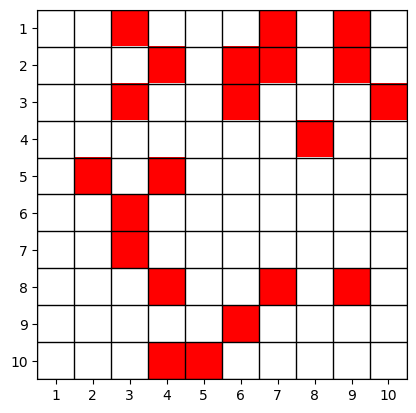

In [4]:
X=10
Y=10
generated_maze = generate_maze(X=X,Y=Y, objects=[0,1], probability=[0.7,0.3])
maze = Maze(generated_maze)
maze.print_maze()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

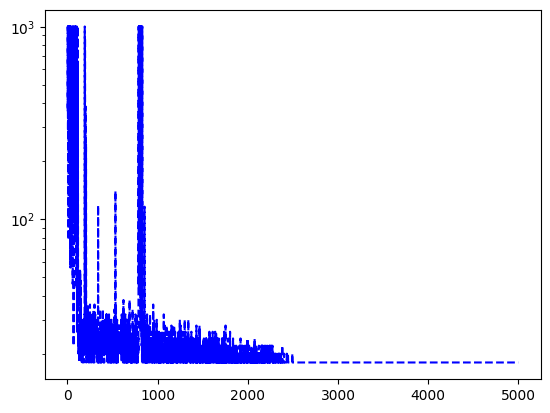

In [5]:

robot = Agent(maze.maze, alpha=0.1, random_factor=0.25)
moveHistory = []
for i in range(5000):
    if i % 10 == 0:
        print(i)
    while not maze.is_game_over():
        state, _ = maze.get_state_and_reward() # get the current state
        action = robot.choose_action(state, maze.allowed_states[state]) # choose an action (explore or exploit)
        maze.update_maze(action) # update the maze according to the action
        state, reward = maze.get_state_and_reward() # get the new state and reward
        robot.update_state_history(state, reward) # update the robot memory with state and reward
        if maze.steps > 1000:
            # end the robot if it takes too long to find the goal
            maze.robot_position = (X-1, Y-1)
    
    robot.learn() # robot should learn after every episode
    moveHistory.append(maze.steps) # get a history of number of steps taken to plot later
    maze = Maze(generated_maze) # reinitialize the maze
plt.semilogy(moveHistory, "b--")
plt.show()

In [6]:
min(moveHistory)

18